# Data Quality Report: Card Transaction 

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
%matplotlib inline

In [9]:
data = pd.read_excel('card transactions.xlsx')
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [10]:
data.shape

(96753, 10)

In [19]:
print(data['Date'].min())
print(data['Date'].max())

2010-01-01 00:00:00
2010-12-31 00:00:00


## Summary Table 

In [30]:
# number with values
pd.DataFrame(data.notnull().sum())

,0
Recnum,96753
Cardnum,96753
Date,96753
Merchnum,93378
Merch description,96753
Merch state,95558
Merch zip,92097
Transtype,96753
Amount,96753
Fraud,96753


In [29]:
# % populated
pd.DataFrame(data.notnull().sum()/len(data))

,0
Recnum,1.000000
Cardnum,1.000000
Date,1.000000
Merchnum,0.965117
Merch description,1.000000
Merch state,0.987649
Merch zip,0.951877
Transtype,1.000000
Amount,1.000000
Fraud,1.000000


In [53]:
# unique value
dict = {}
for col in data.columns:
    dict[col] = len(data[col].unique())
pd.DataFrame(data = dict, index = [0]).transpose()

,0
Recnum,96753
Cardnum,1645
Date,365
Merchnum,13092
Merch description,13126
Merch state,228
Merch zip,4568
Transtype,4
Amount,34909
Fraud,2


In [58]:
# number of records with value 0
dict = {}
for col in data.columns:
    dict[col] = sum(data[col] == 0)
pd.DataFrame(data = dict, index = [0]).transpose()

,0
Recnum,0
Cardnum,0
Date,0
Merchnum,0
Merch description,0
Merch state,0
Merch zip,0
Transtype,0
Amount,0
Fraud,95694


In [60]:
# most common value
dict = {}
for col in data.columns:
    dict[col] = data[col].mode()
pd.DataFrame(data = dict, index = [0]).transpose()

,0
Recnum,1
Cardnum,5142148452
Date,2010-02-28 00:00:00
Merchnum,930090121224
Merch description,GSA-FSS-ADV
Merch state,TN
Merch zip,38118
Transtype,P
Amount,3.62
Fraud,0


In [62]:
# to test the result
data.groupby('Cardnum')[['Recnum']].count().sort_values('Recnum',ascending = False).head()

,Recnum
Cardnum,
5142148452,1192
5142184598,921
5142189108,663
5142297710,583
5142223373,579


In [20]:
data[['Amount']].describe()

,Amount
count,9.675300e+04
mean,4.278857e+02
std,1.000614e+04
min,1.000000e-02
25%,3.348000e+01
50%,1.379800e+02
75%,4.282000e+02
max,3.102046e+06


## Step by Step Description

In [64]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

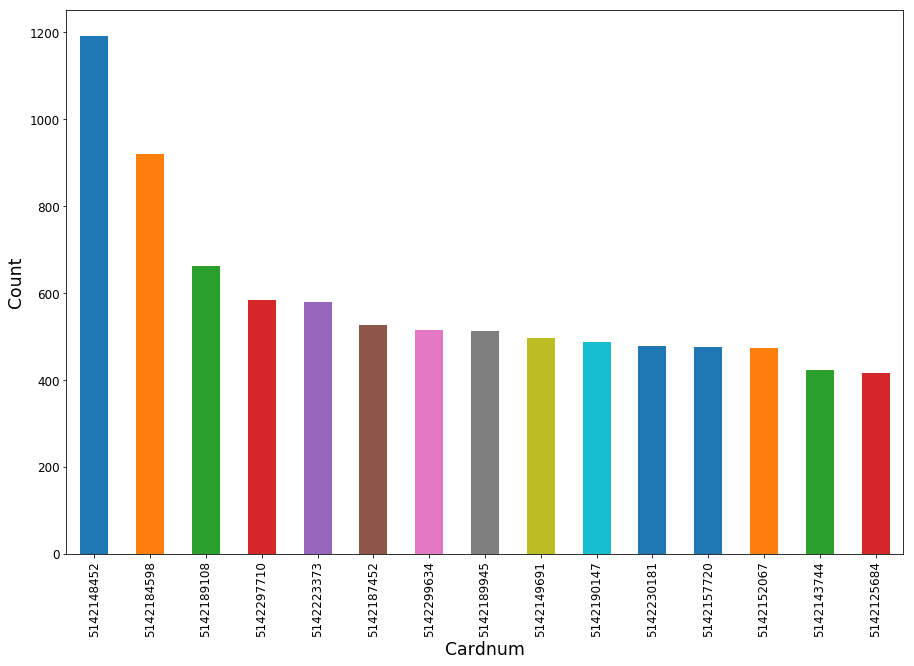

In [66]:
data['Cardnum'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Cardnum')
plt.ylabel('Count')
plt.savefig('01Cardnum.png',bbox_inches='tight')
plt.show()

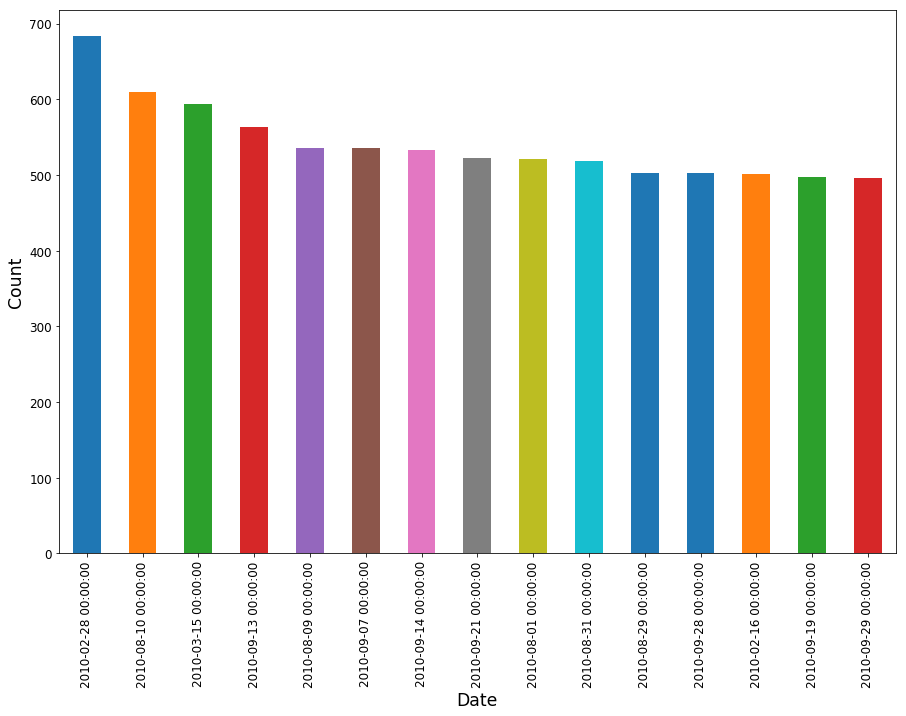

In [67]:
data['Date'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Date')
plt.ylabel('Count')
plt.savefig('02Date.png',bbox_inches='tight')
plt.show()

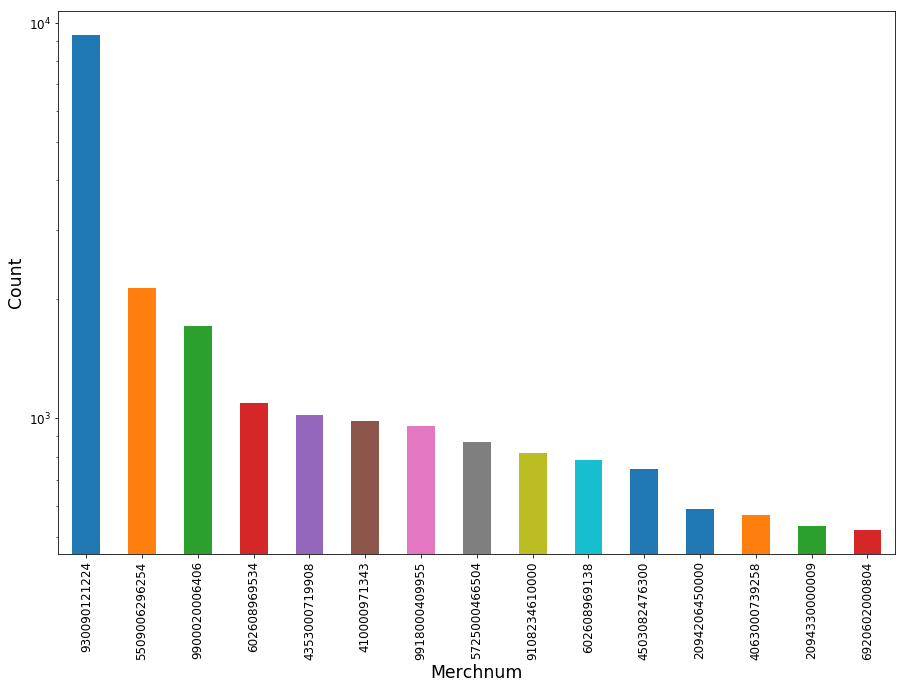

In [96]:
data['Merchnum'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merchnum')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('03Merchnum.png',bbox_inches='tight')
plt.show()

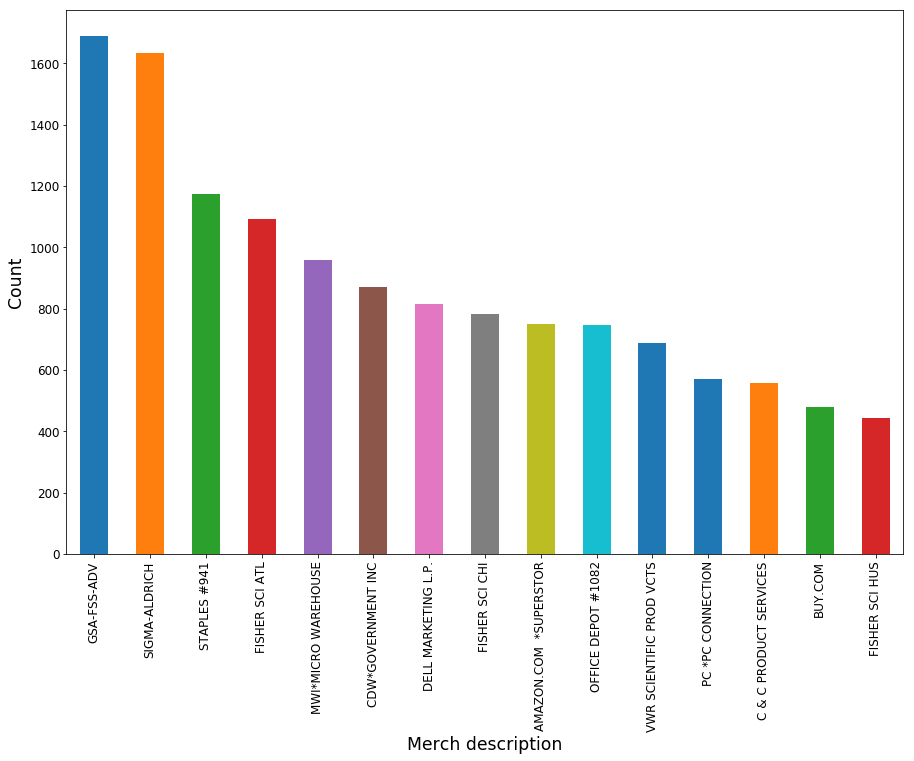

In [69]:
data['Merch description'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merch description')
plt.ylabel('Count')
plt.savefig('04Merch description.png',bbox_inches='tight')
plt.show()

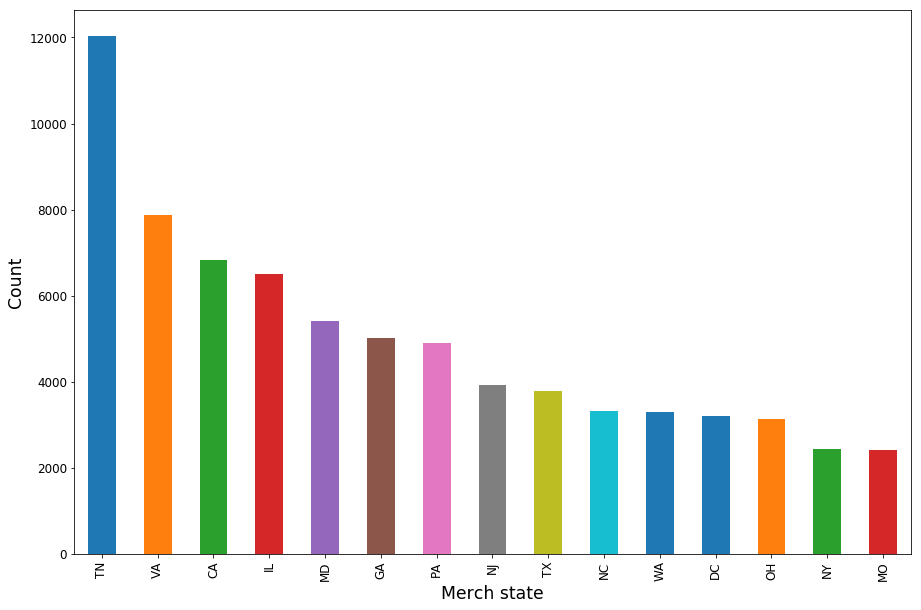

In [70]:
data['Merch state'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merch state')
plt.ylabel('Count')
plt.savefig('05Merch state.png',bbox_inches='tight')
plt.show()

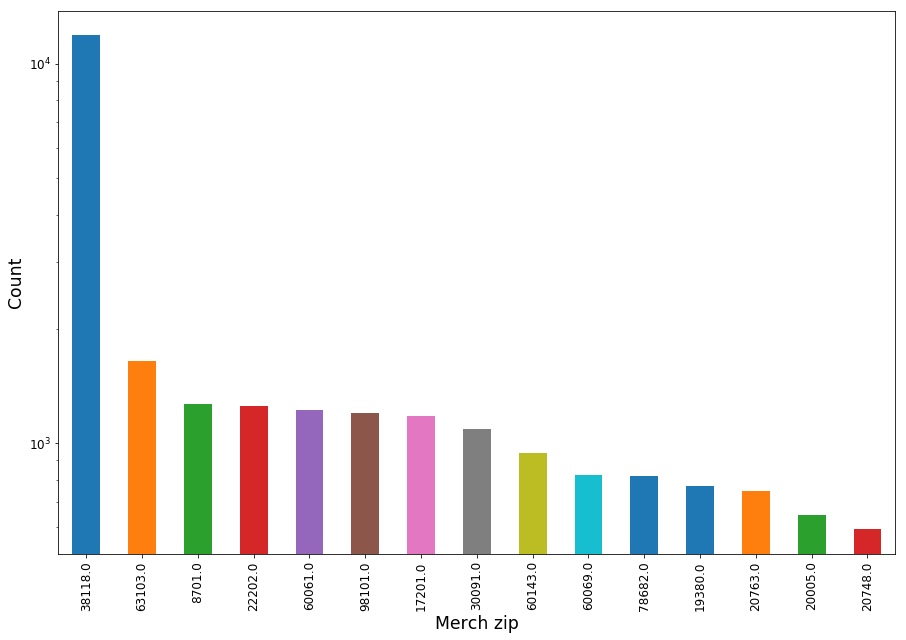

In [97]:
data['Merch zip'].value_counts().head(15).plot(kind = 'bar')
plt.xlabel('Merch zip')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('06Merch zip.png',bbox_inches='tight')
plt.show()

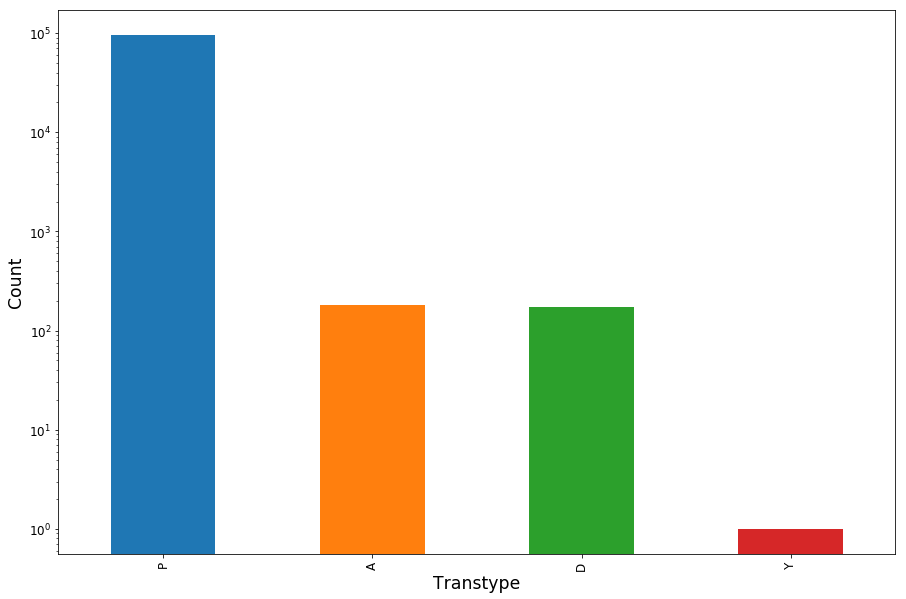

In [98]:
data['Transtype'].value_counts().plot(kind = 'bar')
plt.xlabel('Transtype')
plt.ylabel('Count')
plt.yscale('log')
plt.savefig('07Transtype.png',bbox_inches='tight')
plt.show()

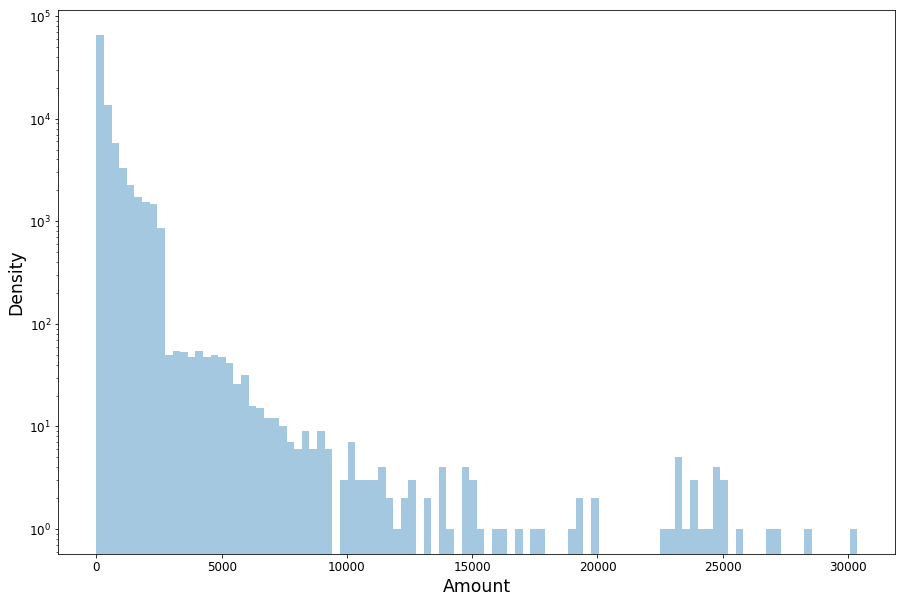

In [83]:
floor = 32000
amount = data[data['Amount'] <= floor]
sns.distplot(amount['Amount'],bins = 100, kde = False)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.yscale('log')
plt.savefig('08Amount.png',bbox_inches = 'tight')

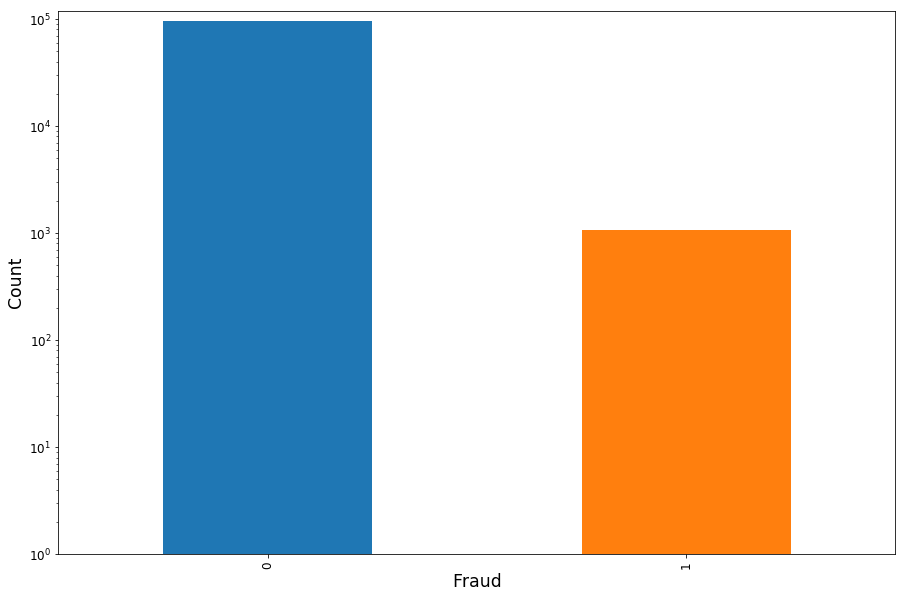

In [101]:
data['Fraud'].value_counts().plot(kind = 'bar')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.yscale('log')
plt.ylim(1)
plt.savefig('09Fraud.png',bbox_inches='tight')
plt.show()